In [1]:
import pandas as pd

# Replace 'your_dataset_url.csv' with the actual URL to your CSV file
file_url = 'https://drive.google.com/uc?id=1ED5QesU7C_8rs4_qjPS5nCBRHw-WWebr'

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(file_url)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(df.head())


  Provinsi    Kab/Kota         Kecamatan  Jumlah Penduduk (jiwa)  \
0     Aceh  Aceh Barat  Arongan Lambalek                   11928   
1     Aceh  Aceh Barat             Bubon                    7339   
2     Aceh  Aceh Barat    Johan Pahlawan                   63975   
3     Aceh  Aceh Barat         Kaway XVI                   21644   
4     Aceh  Aceh Barat          Meureubo                   30253   

   Jumlah Crime  Crime per Capita  Criminal Rate  
0           5.0          0.419182       1.676727  
1           8.0          1.090067       4.360267  
2          55.0          0.859711       3.438843  
3          33.0          1.524672       6.098688  
4          55.0          1.818002       7.272006  


In [2]:
df.fillna(0, inplace=True)
print("Null values in DataFrame:")
print(df.isnull().sum())

Null values in DataFrame:
Provinsi                  0
Kab/Kota                  0
Kecamatan                 0
Jumlah Penduduk (jiwa)    0
Jumlah Crime              0
Crime per Capita          0
Criminal Rate             0
dtype: int64


In [3]:
columns_to_convert = ['Jumlah Penduduk (jiwa)', 'Jumlah Crime', 'Crime per Capita']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

print(df[['Jumlah Penduduk (jiwa)', 'Jumlah Crime', 'Crime per Capita']].head())

   Jumlah Penduduk (jiwa)  Jumlah Crime  Crime per Capita
0                   11928           5.0          0.419182
1                    7339           8.0          1.090067
2                   63975          55.0          0.859711
3                   21644          33.0          1.524672
4                   30253          55.0          1.818002


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df[['Jumlah Penduduk (jiwa)', 'Jumlah Crime', 'Crime per Capita']]
y = df['Criminal Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model for regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, verbose=1)

model.summary()


Epoch 1/50
26/26 [==============================] - 1s 1ms/step - loss: 83.9657 - mae: 4.1790
Epoch 2/50
26/26 [==============================] - 0s 1ms/step - loss: 64.5145 - mae: 3.6446
Epoch 3/50
26/26 [==============================] - 0s 1ms/step - loss: 43.7481 - mae: 3.0026
Epoch 4/50
26/26 [==============================] - 0s 1ms/step - loss: 21.1281 - mae: 2.1306
Epoch 5/50
26/26 [==============================] - 0s 1ms/step - loss: 5.5589 - mae: 1.1327
Epoch 6/50
26/26 [==============================] - 0s 1ms/step - loss: 2.2552 - mae: 0.6122
Epoch 7/50
26/26 [==============================] - 0s 1ms/step - loss: 1.4439 - mae: 0.5655
Epoch 8/50
26/26 [==============================] - 0s 1ms/step - loss: 0.9182 - mae: 0.5081
Epoch 9/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6438 - mae: 0.3997
Epoch 10/50
26/26 [==============================] - 0s 1ms/step - loss: 0.4215 - mae: 0.3508
Epoch 11/50
26/26 [==============================] - 0s 1ms/step 

7/7 [==============================] - 0s 1ms/step
     Actual Criminal Rate  Predicted Criminal Rate
428              0.957702                 0.930536
533              0.505753                 0.495555
388              2.150954                 2.002106
107              1.979125                 1.955742
423              2.384643                 2.366286
..                    ...                      ...
593              0.281047                 0.257062
522              0.907904                 0.863845
371              4.415620                 4.394124
803              3.103809                 3.123802
277              6.120020                 6.135989

[206 rows x 2 columns]


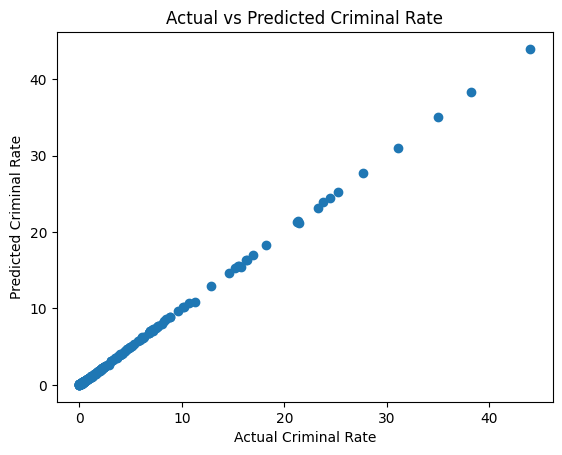

In [6]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Create a DataFrame to compare actual vs predicted data
comparison_df = pd.DataFrame({
    'Actual Criminal Rate': y_test,
    'Predicted Criminal Rate': predictions
})

# Print the DataFrame
print(comparison_df)

# Optionally, visualize the comparison with a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Criminal Rate')
plt.ylabel('Predicted Criminal Rate')
plt.title('Actual vs Predicted Criminal Rate')
plt.show()


In [7]:
import joblib
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [8]:
#model.save('predict_crime_model.h5')
#if __name__ == '__main__':
 #   model.save('predict_crime_model.h5')
model.save('./saved_model_crime')


In [ ]:
!zip -r /content/saved_model_pb.zip /content/saved_model_pb/


  adding: content/saved_model_pb/ (stored 0%)
  adding: content/saved_model_pb/keras_metadata.pb (deflated 87%)
  adding: content/saved_model_pb/fingerprint.pb (stored 0%)
  adding: content/saved_model_pb/variables/ (stored 0%)
  adding: content/saved_model_pb/variables/variables.index (deflated 60%)
  adding: content/saved_model_pb/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/saved_model_pb/assets/ (stored 0%)
  adding: content/saved_model_pb/saved_model.pb (deflated 87%)


In [ ]:
loaded_model = tf.saved_model.load('./saved_model_pb')
print(loaded_model.signatures)


_SignatureMap({'serving_default': <ConcreteFunction (*, dense_input: TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input')) -> Dict[['dense_2', TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_2')]] at 0x7F5A98ACD9C0>})


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model_crime') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)